<h3> Reto: Crear la Clase ConBacktester desde Cero</h3>
Pasos:  
1. Inicializar las propiedades symbol, start, end, tc y results.  
2. Agregar el método get_data() para recuperar y preparar los datos crudos del archivo "intraday_pairs.csv". Llamar a get_data() dentro del método "dunder init"
3. Agregar el método test_strategy() con el parámetro window
4. Agregar el método plot_results().
5. Agregar una representación adecuada y Docstrings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

## Instanciación

In [2]:
class ConBacktester():
    def __init__(self, symbol, start, end, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None


In [3]:
tester = ConBacktester("EURUSD", "2018-01-01", "2019-12-31", 0)

In [4]:
tester.end

'2019-12-31'

In [5]:
tester.tc

0

## Método get_data()

In [8]:
class ConBacktester():
    def __init__(self, symbol, start, end, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()

    def get_data(self):
        raw = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns = {self.symbol: "price"}, inplace = True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        return raw



In [11]:
tester = ConBacktester("EURUSD", "2018-01-01", "2019-12-31", 0)

In [12]:
tester.data

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [13]:
tester.get_data()

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


## Probando una Estrategia

In [20]:
class ConBacktester():
    
    def __init__(self, symbol, start, end, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
    
    def get_data(self):
        raw = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        return raw
    
    def test_strategy(self, window = 1):
        self.window = window
        data = self.data.copy().dropna()
        data["position"] = -np.sign(data["returns"].rolling(window).mean())
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determina cuando ocurre un trade
        data["trades"] = data.position.diff().fillna(0).abs()

        # restar costos de transacción de return cuaando ocurre un trade
        data.strategy = data.strategy - data.trades * self.tc

        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data

        # realización absoluta de la estrategia
        perf = data["cstrategy"].iloc[-1]
        # sobre/sub rendimiento de la estrategia
        outperf = perf - data["creturns"].iloc[-1]

        return round(perf, 6), round(outperf, 6)
    
    



In [21]:
tester = ConBacktester("EURUSD", "2018-01-01", "2019-12-31", 0)

In [22]:
tester.test_strategy(window=3)

(np.float64(1.101019), np.float64(0.171881))

In [23]:
tester.results

,price,returns,position,strategy,trades,creturns,cstrategy
time,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.0,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.0,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.0,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.0,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.0,0.996392,0.998229
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.0,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.0,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.0,0.928923,1.100420


## Graficación de Resultados

In [31]:
class ConBacktester():
    
    def __init__(self, symbol, start, end, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
    
    def get_data(self):
        raw = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        return raw
    
    def test_strategy(self, window = 1):
        self.window = window
        data = self.data.copy().dropna()
        data["position"] = -np.sign(data["returns"].rolling(window).mean())
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        # absolute performance of the strategy
        perf = data["cstrategy"].iloc[-1]
        # out-/underperformance of strategy
        outperf = perf - data["creturns"].iloc[-1]
        
        return round(perf, 6), round(outperf, 6)
    

    def plot_results(self):
        if self.results is None:
            print("Todavía no hay resultados para graficar. Ejecuta una estrategia primero.")
        else:
            title = "{} | Window = {}".format(self.symbol, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12,8))


In [32]:
tester = ConBacktester("EURUSD", "2018-01-01", "2019-12-31", 0)

In [33]:
tester.test_strategy(window=3)

(np.float64(1.101019), np.float64(0.171881))

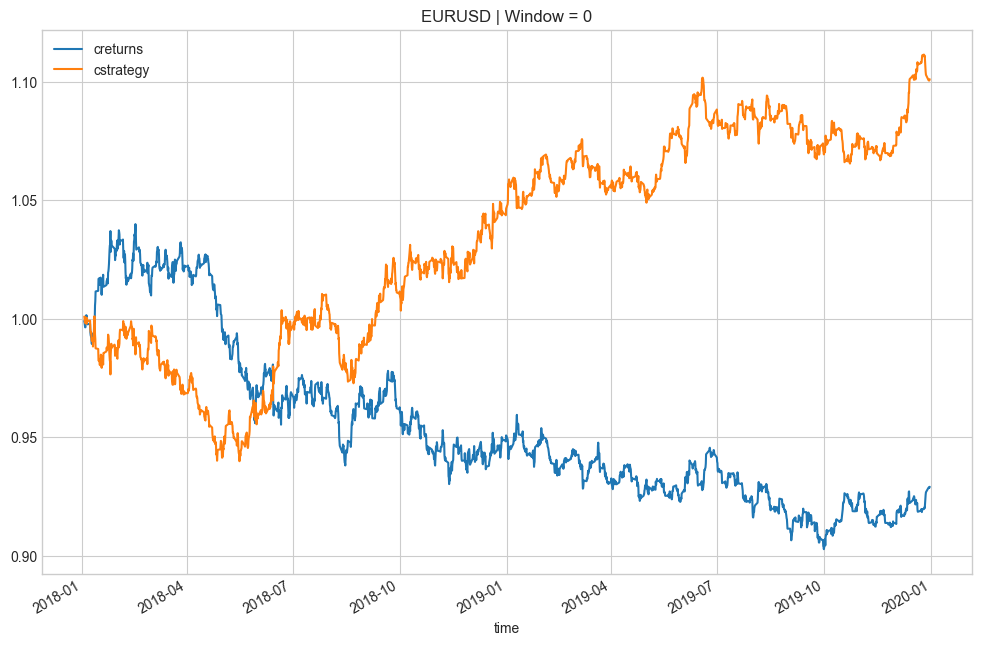

In [34]:
tester.plot_results()

## Documentación de la Clase

__Versión Final__

In [ ]:
class ConBacktester():
    '''clase para el backtesting vectorizado de una simple estrategia Contraria
    Atributos
    =========
    symbol: str
        símbolo del par de divisas
    start: str
        fecha inicial de los datos a recuperar
    end: str
        fecha final de los datos a recuperar
    tc: float
        costo de transacción por trade
        
        
    Metodos
    =======
    get_data:
        recupera y prepara los datos
         
    test_strategy:
        ejecuta el backtest estrategia contraria
         
    plot_:results:
        grafica los rendimientos de la estrategia comparada a B/H
 '''
    def __init__(self, symbol, start, end, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()

    def __repr__(self):
        return "ConBacktester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
    
    
    def get_data(self):
        '''Recupera y prepara los datos
        '''
        raw = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        return raw
    
    def test_strategy(self, window = 1):
        '''Realiza el backtest de la estrategia contraria
        '''
        self.window = window
        data = self.data.copy().dropna()
        data["position"] = -np.sign(data["returns"].rolling(window).mean())
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        # absolute performance of the strategy
        perf = data["cstrategy"].iloc[-1]
        # out-/underperformance of strategy
        outperf = perf - data["creturns"].iloc[-1]
        
        return round(perf, 6), round(outperf, 6)
    

    def plot_results(self):
        '''Grafica los rendimientos acumulativos de la estrategia contraria comparada a B/H
        '''
        if self.results is None:
            print("Todavía no hay resultados para graficar. Ejecuta una estrategia primero.")
        else:
            title = "{} | Window = {}".format(self.symbol, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12,8))
